## Analyzing Factors Influencing Student Performance in Exams

### Introduction

Understanding the diverse factors that contribute to student performance in exams is crucial for educators, policymakers, and parents. This project aims to explore how various elements such as study habits, attendance, parental involvement, access to resources, and extracurricular activities impact academic success. By analyzing a comprehensive dataset containing information on these aspects, we can identify key determinants that influence exam scores.

### EDA


In [3]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset
df = pd.read_csv('C:/Users/jacqu/Datasets/Student Performance Factors/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
#Check for missing values 
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
#handle missing values by filling them with mode
df.fillna({'Teacher_Quality' : df['Teacher_Quality'].mode()[0],
           'Parental_Education_Level' : df['Parental_Education_Level'].mode()[0],
           'Distance_from_Home' : df['Distance_from_Home'].mode()[0]},
          inplace = True)

In [8]:
#check duplicates
df.duplicated().sum()

0

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
df.loc[df['Exam_Score']>100, :]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [11]:
# Score higher than 100 is not posible, deleting 1 outlier

df = df[df['Exam_Score'] <= 100]
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,7.029216,75.067817,1.493188,2.967605,67.230548
std,5.990424,11.546219,1.468177,14.399184,1.229907,1.031309,3.868502
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


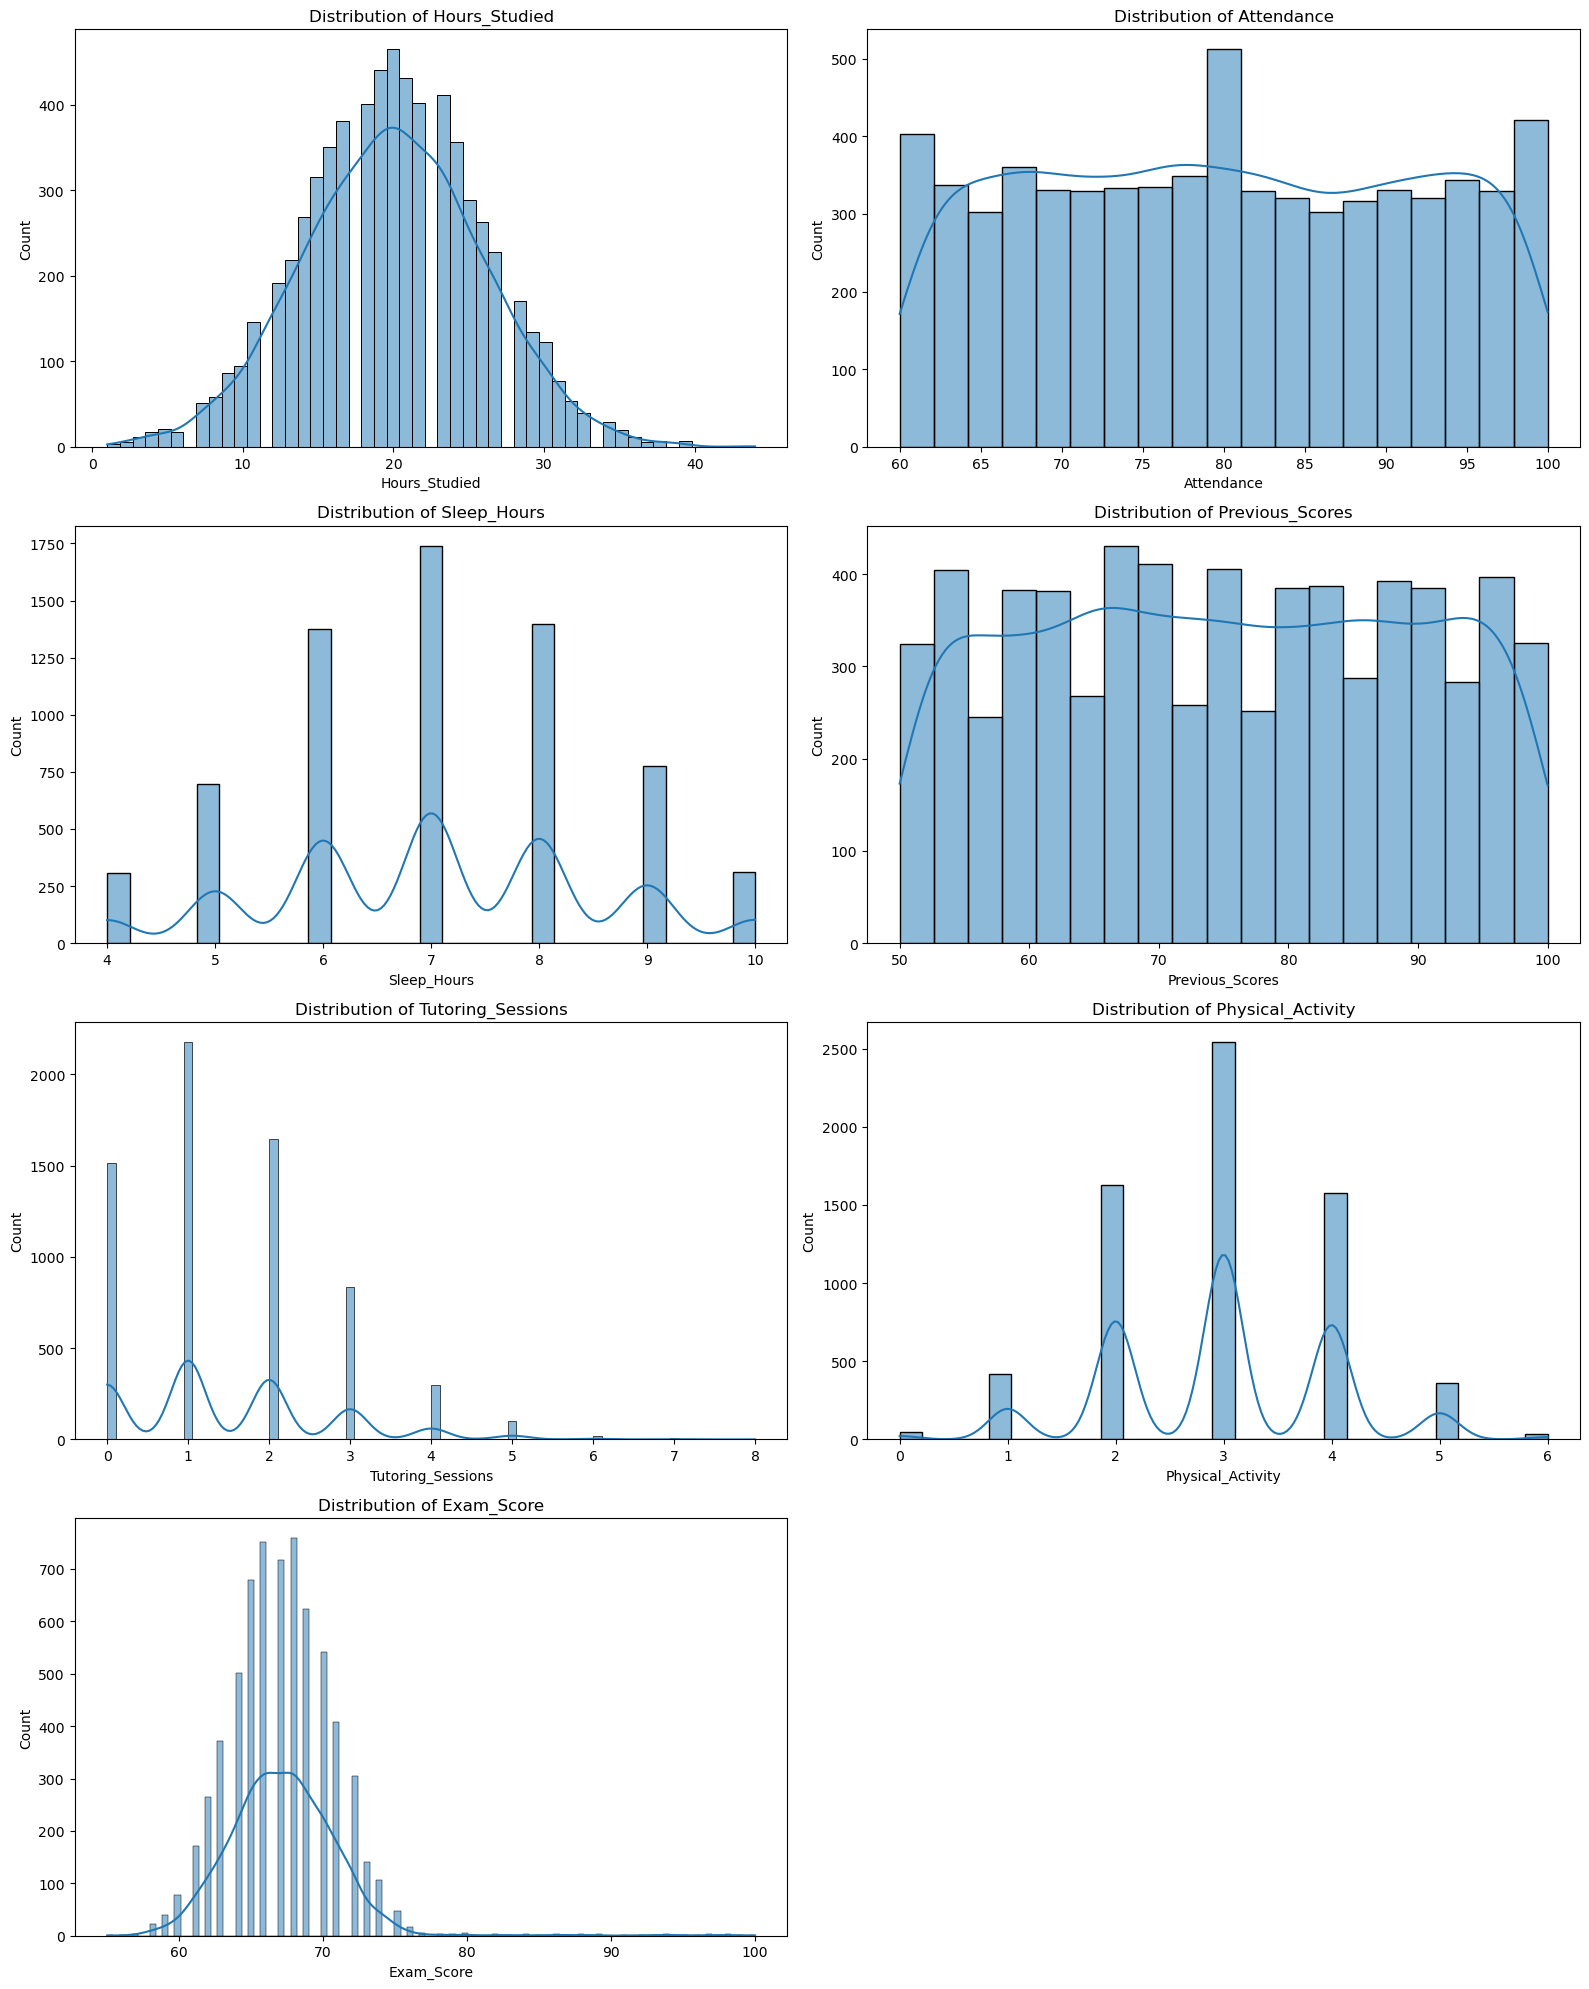

In [12]:
#distribution of numerical features
num_cols = []

for col in df.columns:
    if df[col].dtypes == "int64":
        num_cols.append(col)

fig, ax = plt.subplots(figsize=(16,20), ncols=2, nrows=4)

for i, col in enumerate(num_cols):
    sns.histplot(data=df[col], ax = ax[i // 2, i % 2], kde=True)
    ax[i // 2, i % 2].set_title(f'Distribution of {col}')

fig.delaxes(ax[3, 1])
plt.tight_layout()

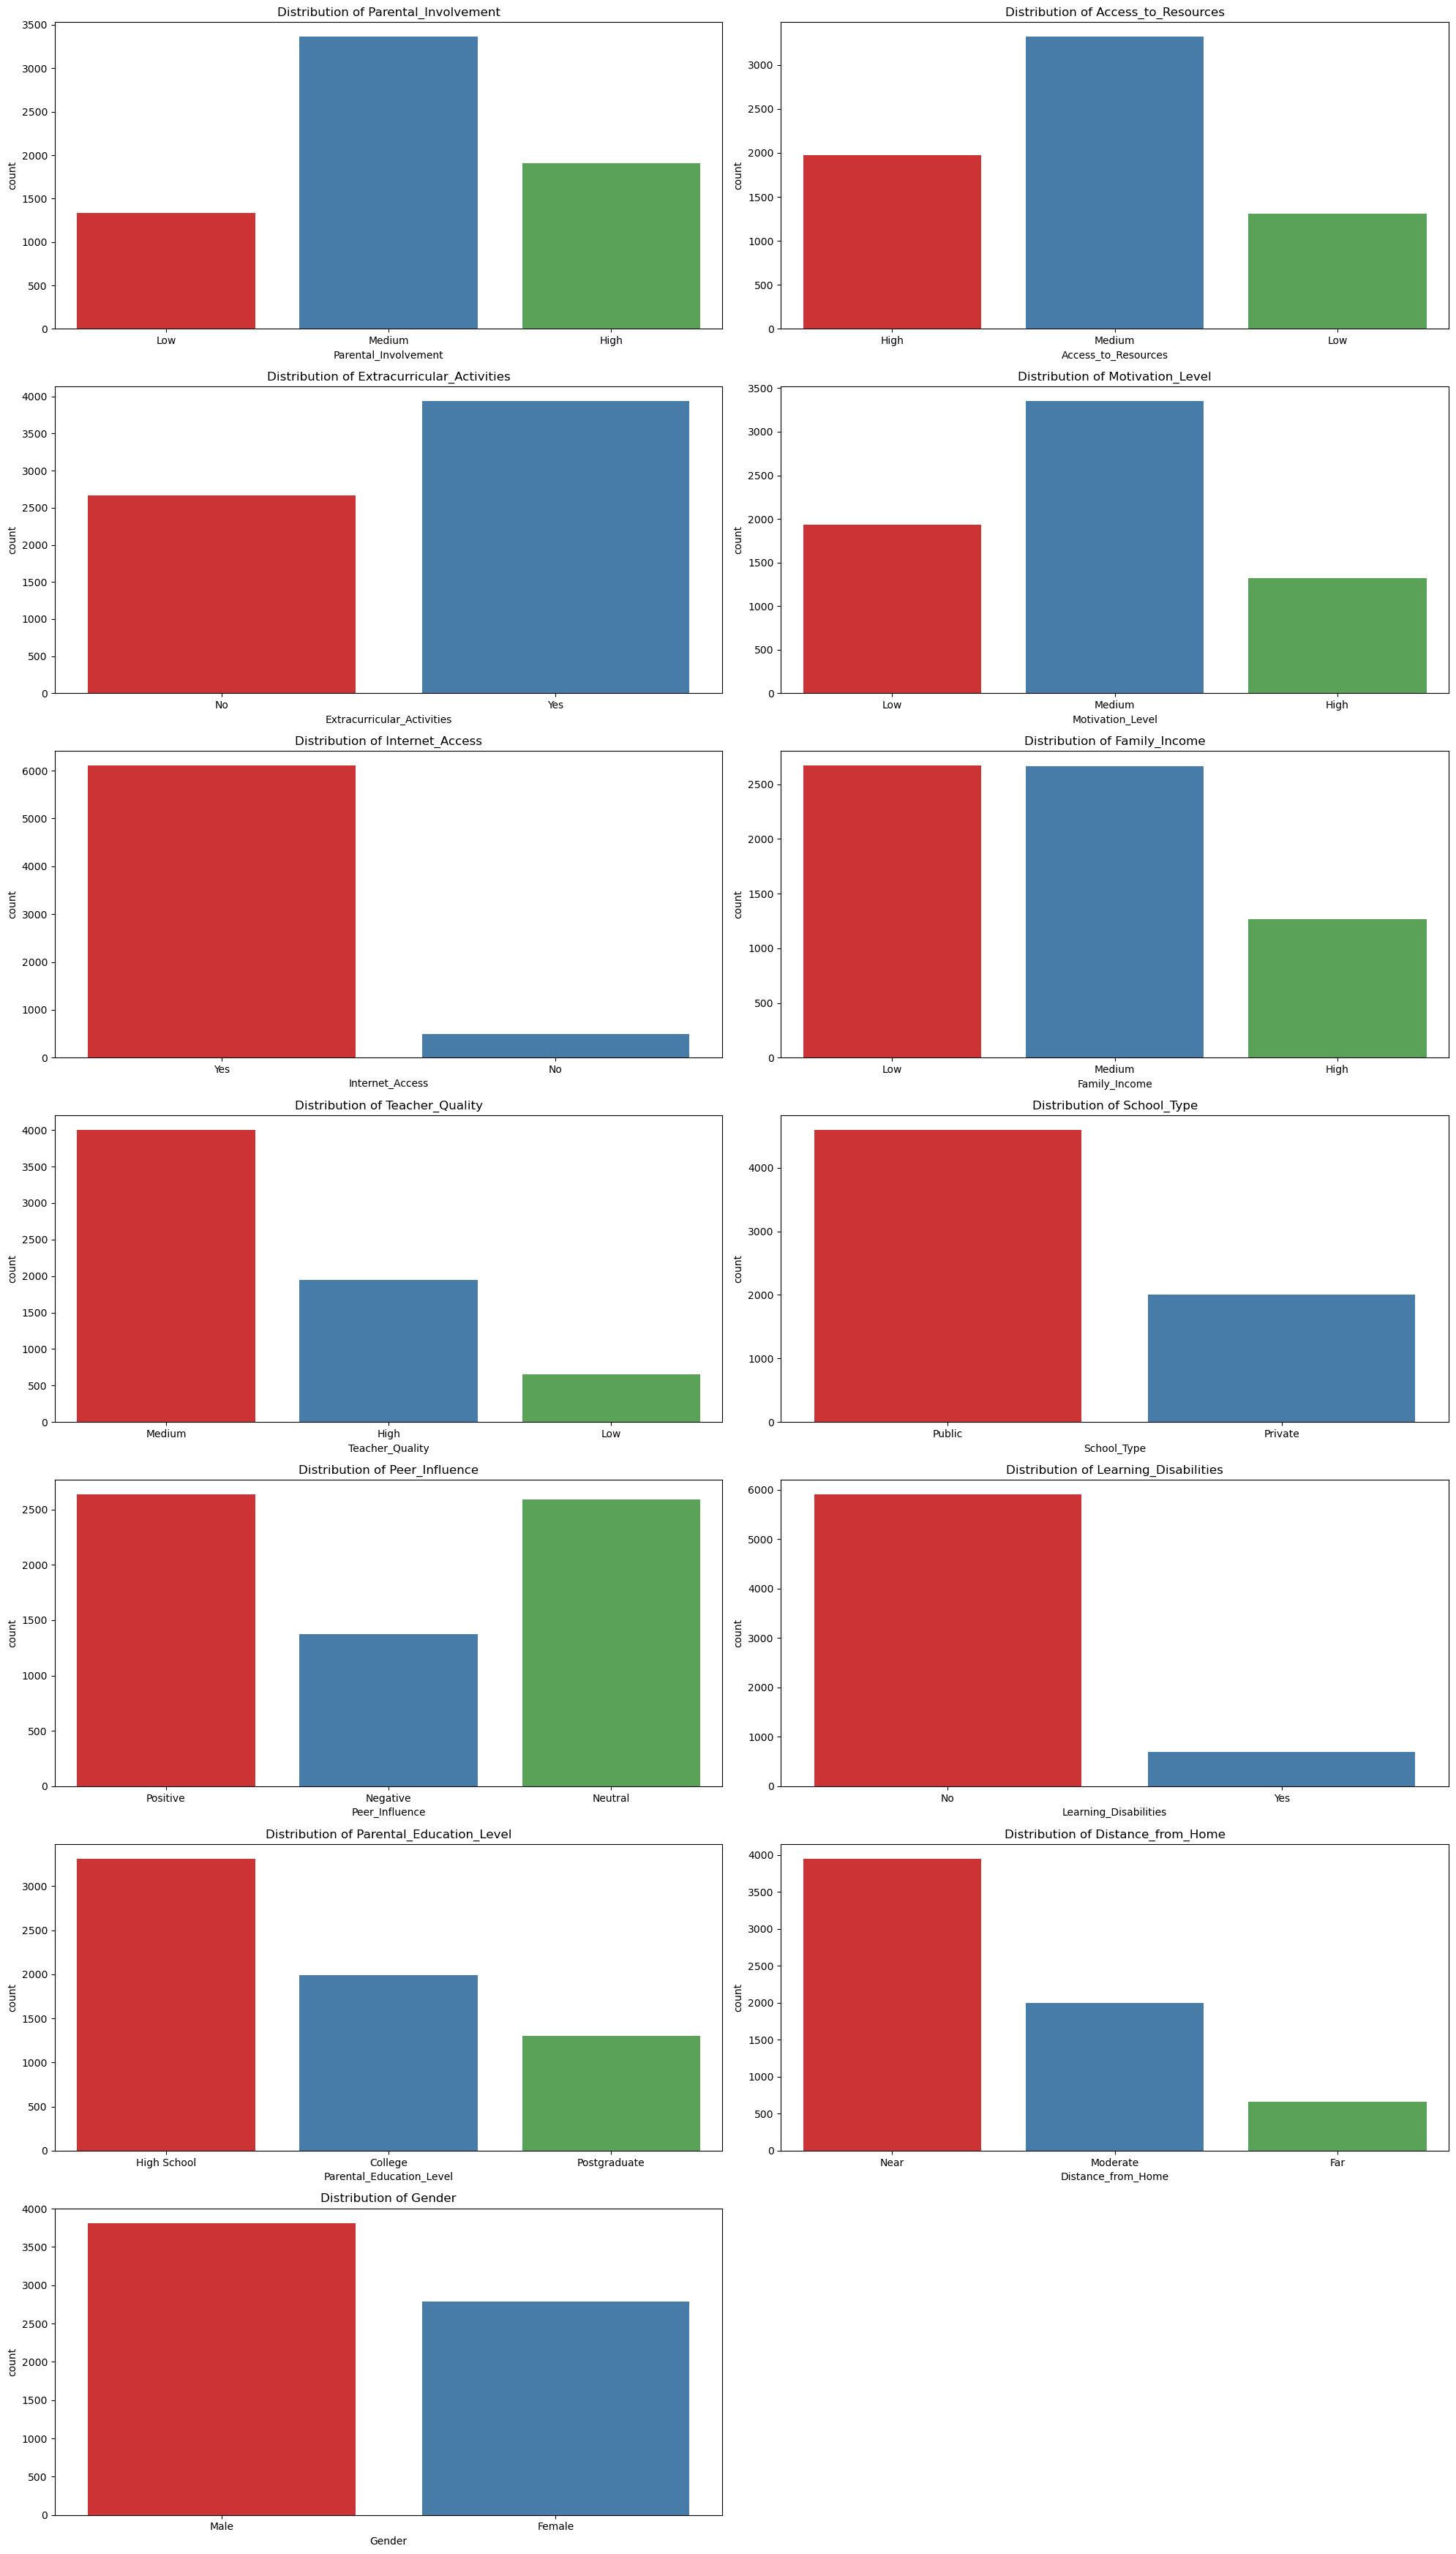

In [13]:
#countplot of categorical features
cat_cols = []

for col in df.columns:
    if df[col].dtypes == "object":
        cat_cols.append(col)

fig, ax = plt.subplots(figsize=(20,35), ncols=2, nrows=7)

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax = ax[i // 2, i % 2], palette='Set1')
    ax[i // 2, i % 2].set_title(f'Distribution of {col}')
    ax[i // 2, i % 2].tick_params(rotation=0)

fig.delaxes(ax[6, 1])
plt.tight_layout()

<Axes: >

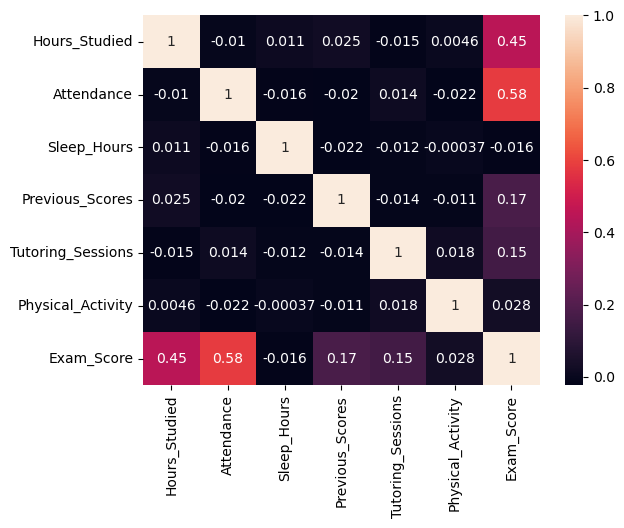

In [14]:
#correlation between numerical features

sns.heatmap(df[num_cols].corr(), annot=True)

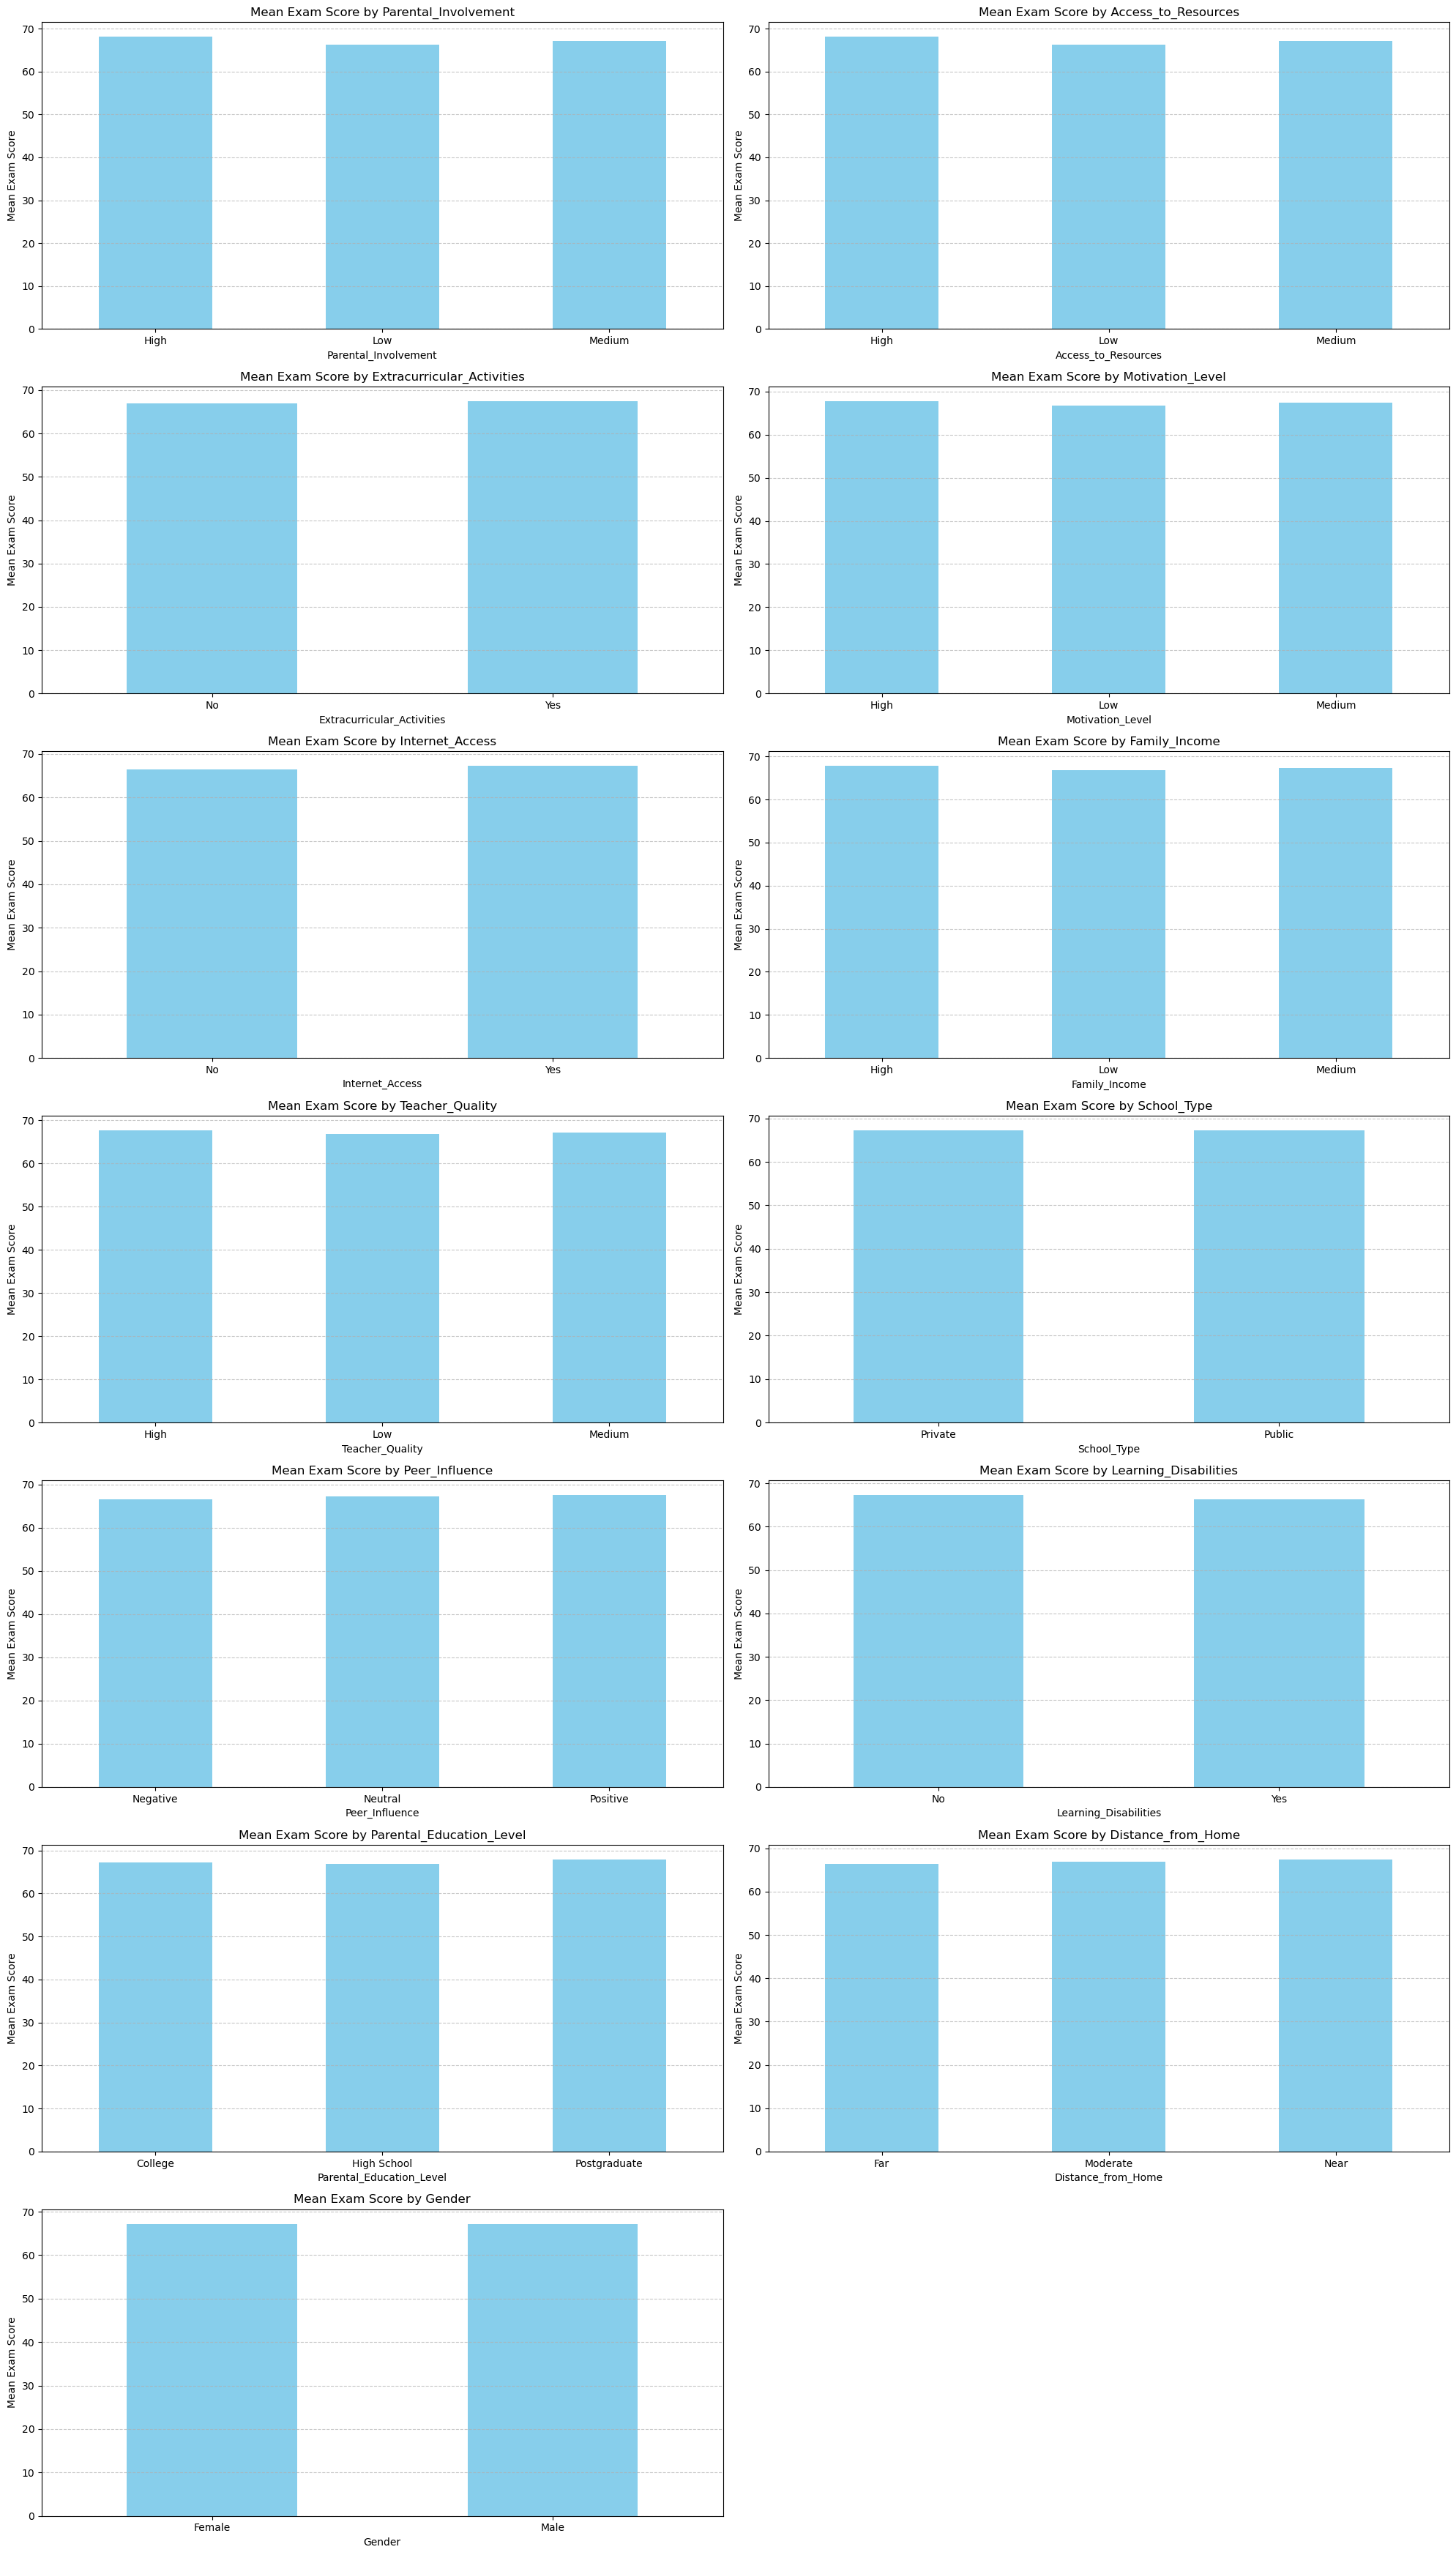

In [15]:
#Behaviour of exam score in relation to categorical variables

fig, ax=plt.subplots(figsize=(20, 35), nrows=7, ncols=2)

for i, col in enumerate(cat_cols):
    mean_scores = df.groupby(col)['Exam_Score'].mean()
    mean_scores.plot(kind='bar', color='skyblue', ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'Mean Exam Score by {col}')
    ax[i // 2, i % 2].set(xlabel=col)
    ax[i // 2, i % 2].set(ylabel='Mean Exam Score')
    ax[i // 2, i % 2].xaxis.set_tick_params(labelrotation=0)
    ax[i // 2, i % 2].grid(axis='y', linestyle='--', alpha=0.7)

fig.delaxes(ax[6, 1])
plt.tight_layout()

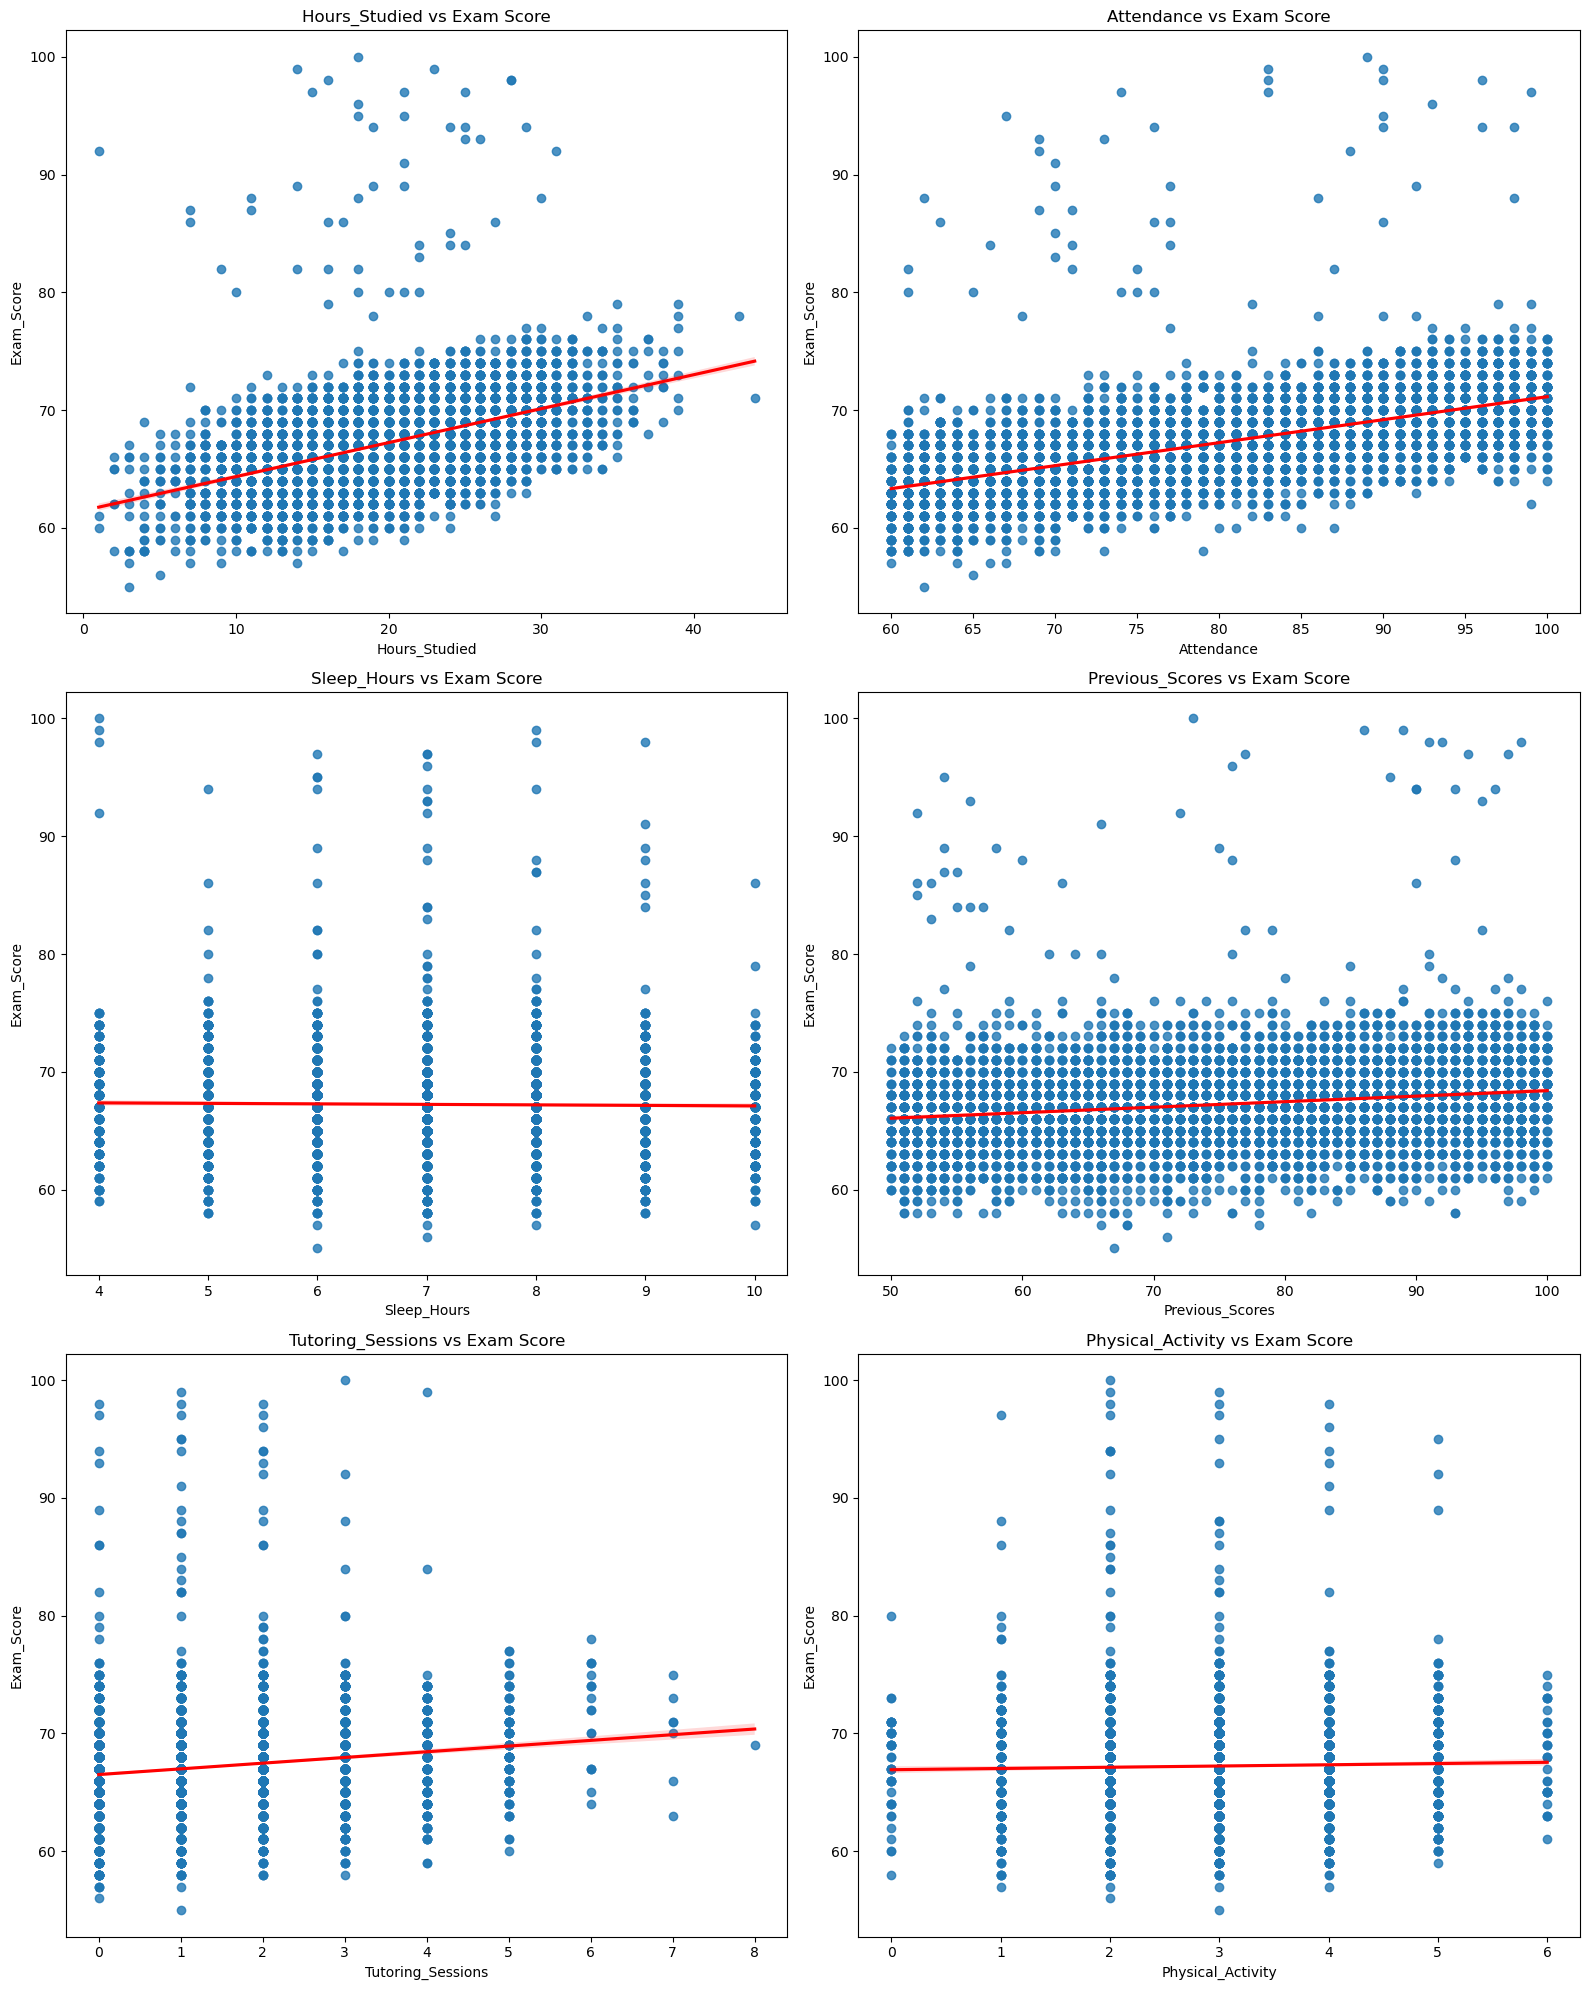

In [16]:
#relationship between numerical features and exam score

fig, ax = plt.subplots(figsize=(16,20), ncols=2, nrows=3)

for i, col in enumerate(num_cols[:-1]):
    sns.regplot(data=df, x=col, y='Exam_Score', ax = ax[i // 2, i % 2], line_kws={"color": "red"})
    ax[i // 2, i % 2].set_title(f'{col} vs Exam Score')

plt.tight_layout()

#### EDA Summary

1. **Dataset Overview**:
   - The dataset consists of 20 columns and 6607 entries.
   - Each column represents a factor that could potentially influence students' final grades.
   - One column contains the students' final grades.

2. **Missing Values**:
   - Some columns had missing values (fewer than 100 missing entries per column).
   - The missing values were replaced with the mode (most frequent value) of the respective column to maintain data integrity.

3. **Duplicates, Outliers, and Realistic Values**:
   - No duplicates were found in the dataset.
   - All numerical values were realistic and plausible.
   - One outlier was detected and deleted

4. **Initial Findings**:
   - Initial analysis revealed that two factors had a significant impact on the final grade:
     - **Attendance (in percentage)**: Students with higher attendance tended to achieve better grades.
     - **Hours spent studying**: More study hours were positively correlated with higher final grades.




### Data preparation


In [19]:
# Train-Test-Split

from sklearn.model_selection import train_test_split

features = df.drop('Exam_Score', axis=1)
target = df.loc[:, 'Exam_Score']

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=42,
                                                                            test_size=0.1)

In [20]:
num_cols.remove('Exam_Score')

### Modeling

In [22]:
#testing Linear Regression, Random Forest and SVR

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

#Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(sparse_output=False), cat_cols) 
    ])

#Linear Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
], memory='cache_directory')

#SVR Pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
], memory='cache_directory')

#Fit Models
linear_pipeline.fit(features_train, target_train)
rf_pipeline.fit(features_train, target_train)
svr_pipeline.fit(features_train, target_train)

# Predictions
y_pred_linear = linear_pipeline.predict(features_test)
y_pred_rf = rf_pipeline.predict(features_test)
y_pred_svr = svr_pipeline.predict(features_test)

# Evaluation
mse_linear = mean_squared_error(target_test, y_pred_linear)
r2_linear = r2_score(target_test, y_pred_linear)

mse_rf = mean_squared_error(target_test, y_pred_rf)
r2_rf = r2_score(target_test, y_pred_rf)

mse_svr = mean_squared_error(target_test, y_pred_svr)
r2_svr = r2_score(target_test, y_pred_svr)


print(f'Linear Regression - MSE: {mse_linear}, R²: {r2_linear}')
print(f'Random Forest - MSE: {mse_rf}, R²: {r2_rf}')
print(f'SVR - MSE: {mse_svr}, R²: {r2_svr}')

Linear Regression - MSE: 1.8469728290944525, R²: 0.8449402428709709
Random Forest - MSE: 3.0509220877458394, R²: 0.7438645385068263
SVR - MSE: 1.9221951653513765, R²: 0.8386250675706415


In [23]:
#testing Ridge and Lasso to reduce overfitting

from sklearn.linear_model import Ridge, Lasso

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

ridge_pipeline.fit(features_train, target_train)
y_pred_ridge = ridge_pipeline.predict(features_test)
mse_ridge = mean_squared_error(target_test, y_pred_ridge)
r2_ridge = r2_score(target_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}')

lasso_pipeline.fit(features_train, target_train)
y_pred_lasso = lasso_pipeline.predict(features_test)
mse_lasso = mean_squared_error(target_test, y_pred_lasso)
r2_lasso = r2_score(target_test, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R²: {r2_lasso}')

Ridge Regression - MSE: 1.8527461744054585, R²: 0.8444555505638375
Lasso Regression - MSE: 6.117792689489669, R²: 0.4863901441023819


#### Bayes Search for Ridge and SVR

In [25]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Ridge Regression with BayesSearchCV
ridge_params = {
    'regressor__alpha': Real(0.001, 1000, prior='log-uniform'),
    'regressor__fit_intercept': Categorical([True, False])
}

ridge_bayes_search = BayesSearchCV(
    estimator=ridge_pipeline,
    search_spaces=ridge_params,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42
)

ridge_bayes_search.fit(features_train, target_train)
print(f"Beste Parameter für Ridge: {ridge_bayes_search.best_params_}")
y_pred_ridge = ridge_bayes_search.predict(features_test)
mse_ridge = mean_squared_error(target_test, y_pred_ridge)
r2_ridge = r2_score(target_test, y_pred_ridge)
print(f'Optimierte Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}')

Beste Parameter für Ridge: OrderedDict({'regressor__alpha': 10.482670679416925, 'regressor__fit_intercept': True})
Optimierte Ridge Regression - MSE: 1.8515240759799723, R²: 0.84455814995353


In [26]:
# SVR with BayesSearchCV
svr_params = {
    'regressor__C': Real(1, 200, prior='log-uniform'),
    'regressor__kernel': Categorical(['linear']),
    'regressor__epsilon': Real(0.1, 1.0, prior='log-uniform')
}

svr_bayes_search = BayesSearchCV(
    estimator=svr_pipeline,
    search_spaces=svr_params,
    n_iter=30,
    cv=3,
    n_jobs=-1,
    random_state=42
)

svr_bayes_search.fit(features_train, target_train)
print(f"Beste Parameter für SVR: {svr_bayes_search.best_params_}")
y_pred_svr = svr_bayes_search.predict(features_test)
mse_svr = mean_squared_error(target_test, y_pred_svr)
r2_svr = r2_score(target_test, y_pred_svr)
print(f'Optimierter SVR - MSE: {mse_svr}, R²: {r2_svr}')

Beste Parameter für SVR: OrderedDict({'regressor__C': 200.0, 'regressor__epsilon': 0.8153832630226038, 'regressor__kernel': 'linear'})
Optimierter SVR - MSE: 1.825847860101239, R²: 0.8467137570829001


#### Stacking

In [28]:
from sklearn.ensemble import StackingRegressor

# Using the best models from BayesSearchCV for Ridge und SVR
best_ridge_model = ridge_bayes_search.best_estimator_
best_svr_model = svr_bayes_search.best_estimator_

# Stacking 
stacking_regressor = StackingRegressor(
    estimators=[
        ('ridge', best_ridge_model),
        ('svr', best_svr_model)
    ],
    final_estimator=Ridge() 
)

# Fitting
stacking_regressor.fit(features_train, target_train)

# Prediction
y_pred_stacking = stacking_regressor.predict(features_test)

# Evaluation
mse_stacking = mean_squared_error(target_test, y_pred_stacking)
r2_stacking = r2_score(target_test, y_pred_stacking)
print(f'Stacking Regressor - MSE: {mse_stacking}, R²: {r2_stacking}')


Stacking Regressor - MSE: 1.8253794258083862, R²: 0.8467530837619591


It is noticeable that the result of the stacking regressor is almost identical to that of the SVR. The MSE is slightly worse, but the R² remains at the same level as with the SVR. This means that the stacking regressor does not lead to a significant improvement, which could indicate that SVR is already the strongest model in this combination.

#### Learning Curves

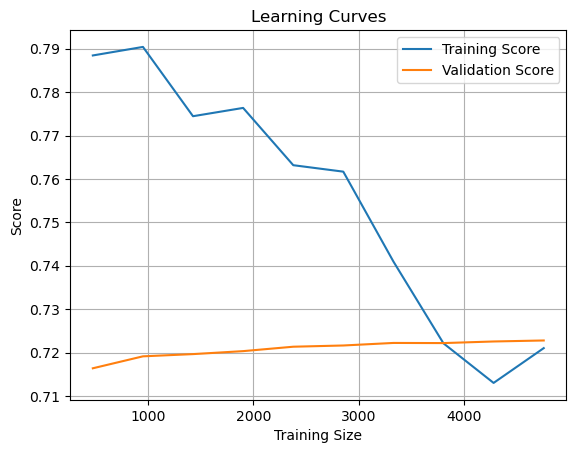

In [31]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_svr_model, features_train, target_train, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()

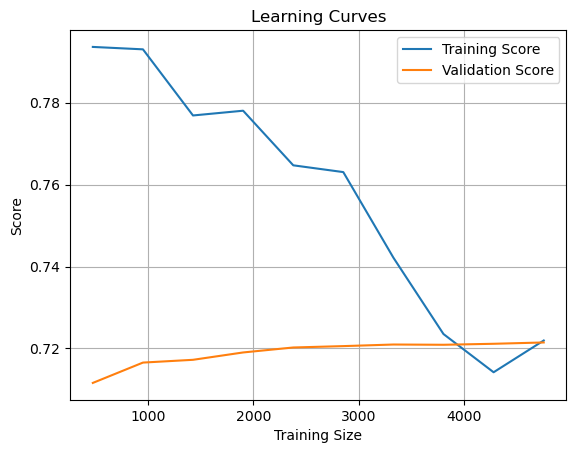

In [36]:
train_sizes, train_scores, test_scores = learning_curve(best_ridge_model, features_train, target_train, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()

#### Permutation Feature Importance